프로젝트

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import streamlit as st
import joblib
from sklearn.metrics import accuracy_score

#수면시간 데이터셋 불러오기
df=pd.read_csv("dataset/sleeptime_prediction_dataset.csv");
print(df.head());
print(df.shape);


#IQR 방법을 사용하여 이상치 제거
def remove_outliers(df):
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

#이상치 제거
df_clean=remove_outliers(df);

#독립변수(X)와 종속변수(y) 분리
X_clean=df_clean.drop("SleepTime",axis=1);     #SleepTime을 제외한 모든 특성을 독립변수로 분리
y_clean=df_clean["SleepTime"]; 

#데이터 분리
X_train, X_test, y_train, y_test=train_test_split(X_clean,y_clean,test_size=0.2,random_state=42);

#모델 생성 및 학습
model=LinearRegression();
model.fit(X_train,y_train);

#결측값 확인 및 처리
print(df.isnull().sum());

#예측
#학습된 모델을 사용해 테스트 세트에 대해 예측을 수행

y_pred=model.predict(X_test);

#모델 평가
#r2_score, mean_squared_error, mean_absolute_error를 사용하여 모델 성능을 평가
print("\n결과:")
print("회귀 계수 (coefficients):", model.coef_)
print("절편 (intercept):", model.intercept_)
print("\n모델 성능:");
print("R2 점수:", r2_score(y_test,y_pred));
print("평균 제곱 오차(MSE):", mean_squared_error(y_test, y_pred));
print("평균 절대 오차(MAE):", mean_absolute_error(y_test, y_pred));



   WorkoutTime  ReadingTime  PhoneTime  WorkHours  CaffeineIntake  \
0         1.12         0.52       3.29       7.89          216.08   
1         2.85         0.49       4.22       5.03          206.18   
2         2.20         1.81       4.04       9.23           28.73   
3         1.80         0.50       1.62       7.68          276.77   
4         0.47         0.54       1.60       4.94          170.54   

   RelaxationTime  SleepTime  
0            0.75       3.45  
1            0.67       4.88  
2            0.35       3.61  
3            1.21       4.94  
4            0.95       5.50  
(2000, 7)
WorkoutTime       0
ReadingTime       0
PhoneTime         0
WorkHours         0
CaffeineIntake    0
RelaxationTime    0
SleepTime         0
dtype: int64

결과:
회귀 계수 (coefficients): [ 0.43052041  0.25483517 -0.55049131 -0.37169172 -0.00195931  0.3491196 ]
절편 (intercept): 7.890799925124212

모델 성능:
R2 점수: 0.921826760381272
평균 제곱 오차(MSE): 0.0840006292449231
평균 절대 오차(MAE): 0.11473508157358668


특성 중요도:
          feature  importance
2       PhoneTime    0.550491
0     WorkoutTime    0.430520
3       WorkHours    0.371692
5  RelaxationTime    0.349120
1     ReadingTime    0.254835
4  CaffeineIntake    0.001959


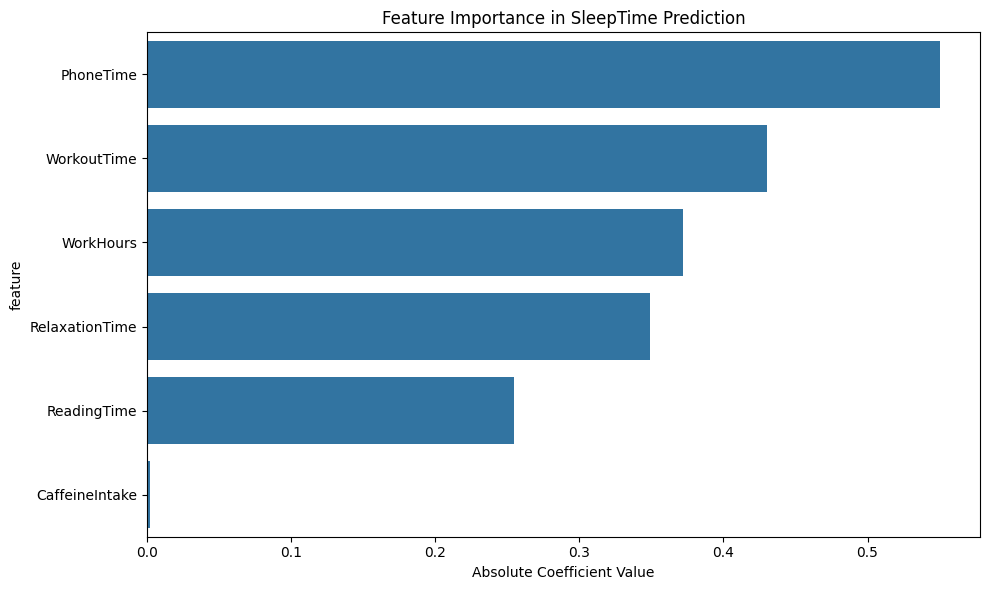

In [52]:
#특성 중요도 분석
feature_importance=pd.DataFrame({
    "feature":X_clean.columns,
    "importance":np.abs(model.coef_)
})
feature_importance=feature_importance.sort_values("importance",ascending=False);
print("\n특성 중요도:");
print(feature_importance);

#특성 중요도 시각화
plt.figure(figsize=(10,6));
sns.barplot(x="importance",y="feature",data=feature_importance);
plt.title("Feature Importance in SleepTime Prediction");
plt.xlabel("Absolute Coefficient Value");
plt.tight_layout();
plt.show();


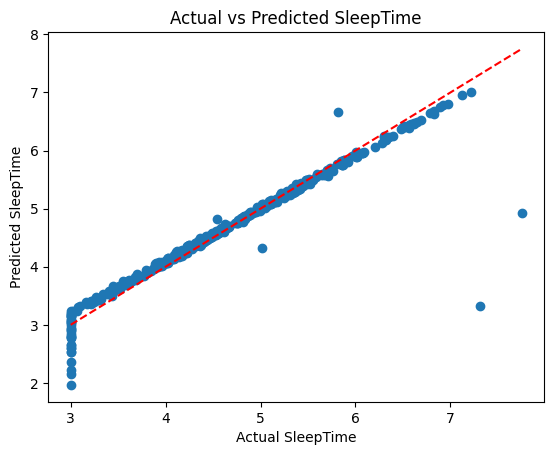

In [53]:
# 실제 값과 예측 값 비교 시각화
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual SleepTime')
plt.ylabel('Predicted SleepTime')
plt.title('Actual vs Predicted SleepTime')
plt.show()

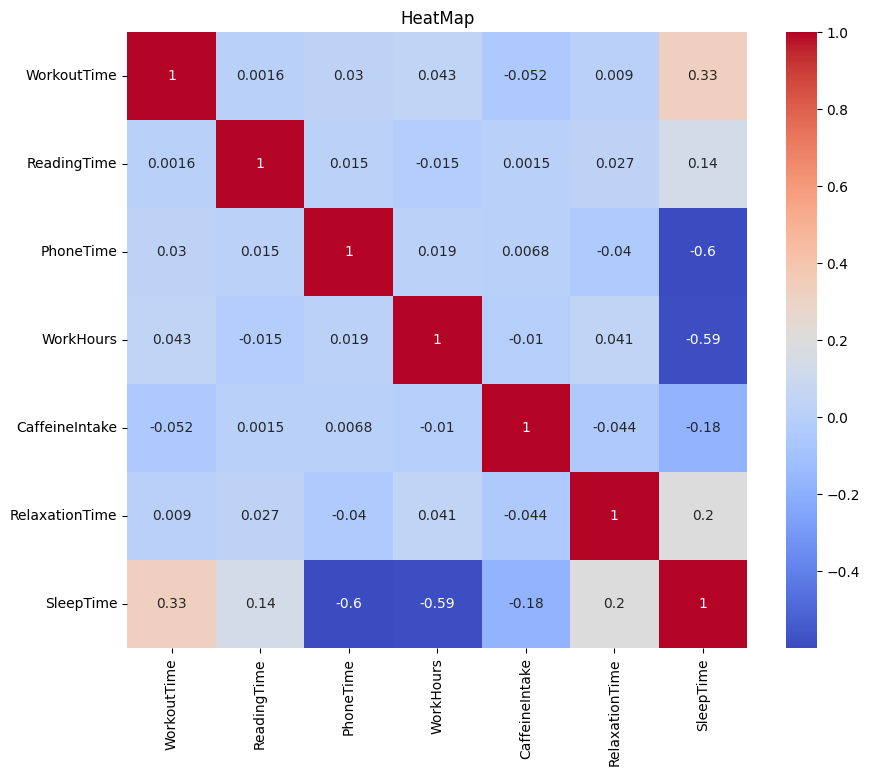

In [57]:
#변수별 상관관계 히트맵
plt.figure(figsize=(10,8));
sns.heatmap(df_clean.corr(),annot=True,cmap="coolwarm");
plt.title("HeatMap");
plt.show();

EDA보고서

In [58]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    df_clean,
    title="EDA 보고서",
    explorative=True,
    html={
        'style': {
            'theme': 'united'  # 허용된 theme 중 하나로 변경
        }
    }
)

# 리포트 저장 및 출력
profile.to_file("./report/project_eda_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 91.24it/s]


Linear Regression - MSE: 0.08, R2: 0.92
Decision Tree - MSE: 0.33, R2: 0.69
RandomForestRegressor - MSE: 0.12, R2: 0.89


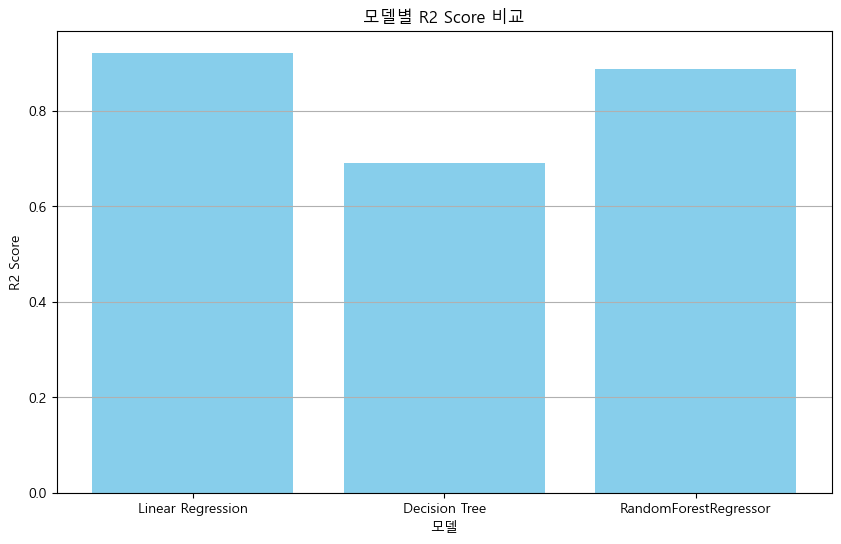

In [16]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

#모델 비교
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor":RandomForestRegressor(random_state=42, n_estimators=100)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} - MSE: {mse:.2f}, R2: {r2:.2f}")
    
    
# 결과 시각화
r2_scores = [result["R2"] for result in results.values()]
model_names = list(results.keys())
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color='skyblue')
plt.xlabel("모델")
plt.ylabel("R2 Score")
plt.title("모델별 R2 Score 비교")
plt.grid(axis='y')
plt.show()

In [12]:
#랜덤 포레스트 모델
rf_model=RandomForestRegressor(random_state=42, n_estimators=100)  #n_esimators: 모델을 구성하는 결정 틀의 개수
rf_model.fit(X_train,y_train);
rf_y_pred=rf_model.predict(X_test);

#랜덤 포레스트 평가
rf_mse=mean_squared_error(y_test,rf_y_pred);
rf_r2=r2_score(y_test, rf_y_pred);
print(f"랜덤 포레스트 -MSE: {rf_mse:.2f}, R2: {rf_r2:.2f}");

랜덤 포레스트 -MSE: 0.12, R2: 0.89


Streamlit 출력

In [23]:
#선형회귀 모델 학습
model=LinearRegression();
model.fit(X_train,y_train);

#모델 저장
joblib.dump(model,"sleeptime_model.pkl");

#Streamlit
st.title("수면시간 예측 시스템");
st.write("핸드폰 사용시간, 근무시간, 운동시간을 입력하여 수면시간을 예측")

#사용자 입력받기
phone_time=st.slider("PhoneTime(핸드폰 사용시간)", min_value=0.0, max_value=5.0, step=0.1);
workhours=st.slider("WorkHours(근무시간)", min_value=0.0, max_value=10.0, step=0.1);
workout_time=st.slider("WorkoutTime(운동시간)",min_value=0.0, max_value=3.0, step=0.1);

#예측하기 버튼
if st.button("예측하기"):
    #입력값을 모델에 전달
    model-joblib.load("sleeptime_model.pkl");
    input_data=np.array([[phone_time,workhours,workout_time]]);
    prediction=model.predict(input_data)[0];
    st.write(f"예측수면시간: {prediction}시간");

2025-01-07 16:11:46.580 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:11:46.582 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:11:46.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:11:46.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:11:46.584 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:11:46.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:11:46.586 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 16:11:46.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar